# Implement the Navie Bayes classifier on covid dataset to predict whether a patient is covid +ve or not. Compute the accuracy , precision recall F! score ROC curveof the classifier, considering 80% training data. Draw the validation curves of th classifier.

In [26]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/covid.csv')

In [27]:
data.describe()

,pc,wbc,mc,ast,bc,ldh,diagnosis
count,25,25,25,25,25,25,25
unique,3,3,3,2,2,2,2
top,Low,Normal,Normal,High,Normal,Normal,True
freq,9,10,13,18,18,14,16


In [28]:
data.shape

(25, 7)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pc         25 non-null     object
 1   wbc        25 non-null     object
 2   mc         25 non-null     object
 3   ast        25 non-null     object
 4   bc         25 non-null     object
 5   ldh        25 non-null     object
 6   diagnosis  25 non-null     bool  
dtypes: bool(1), object(6)
memory usage: 1.3+ KB


In [30]:
data.head()

,pc,wbc,mc,ast,bc,ldh,diagnosis
0,Low,Low,Low,High,Normal,Normal,True
1,Low,Low,Normal,High,Normal,High,True
2,Low,High,Normal,High,Normal,Normal,False
3,Low,High,Normal,High,High,Normal,True
4,Low,Normal,High,High,Normal,Normal,False


In [37]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

pc = LabelEncoder().fit_transform(data['pc'].values)
wbc = LabelEncoder().fit_transform(data['wbc'].values)
mc = LabelEncoder().fit_transform(data['mc'].values)
ast = LabelEncoder().fit_transform(data['ast'].values)
bc = LabelEncoder().fit_transform(data['bc'].values)
ldh = LabelEncoder().fit_transform(data['ldh'].values)
y = LabelEncoder().fit_transform(data['diagnosis'].values)
X = np.array(list(zip(pc,wbc,mc,ast,bc,ldh)))

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = MultinomialNB().fit(X_train,y_train)


In [39]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 1, 1])

In [40]:
from sklearn.metrics import accuracy_score
print("Accuracy: ",accuracy_score(y_test,y_pred))

Accuracy:  0.8


In [41]:
from sklearn.metrics import classification_report
print("Classification report: ",classification_report(y_test,y_pred))

Classification report:                precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.75      0.86         4

    accuracy                           0.80         5
   macro avg       0.75      0.88      0.76         5
weighted avg       0.90      0.80      0.82         5



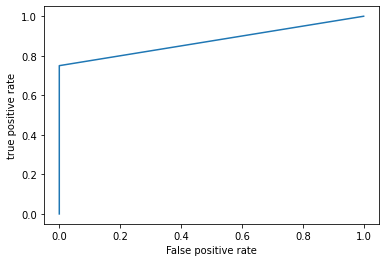

In [43]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
fpr,tpr,threshold = roc_curve(y_test,y_pred,pos_label=None)
plt.plot(fpr,tpr)
plt.xlabel("False positive rate")
plt.ylabel("true positive rate")
plt.show()

In [44]:
from sklearn import metrics
print("Auc value",metrics.auc(fpr,tpr))

Auc value 0.875
